# Análises Exploratória: case Kognita Lab

> Candidato: Oscar J. O. Ayala

> Vaga: Cientista de Dados Júnior

# Conteúdo
1. [**Importação e estutura dos dados**](#desafio1) <br>
2. [**Conjunto de trinamento e teste**](#desafio2)<br>
3. [**Análise exploratória**](#desafio3)<br> 
 - 3.1 [**Valores ausentes**](#desafio31)<br> 
 - 3.2 [**Consistencia e redundancia**](#desafio32)<br> 
 - 3.3 [**Caraterísticas da distribução**](#desafio33)<br> 
 - 3.4 [**Variável de resposta e temporais**](#desafio34)<br> 
 - 3.5 [**Análise Correlações**](#desafio35)<br>    
     
        
        
    

# <a id="desafio1"></a> 1) Importação e estutura dos dados

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt

In [2]:
data_set = pd.read_csv('dataset/dataset_2021-5-26-10-14.csv', sep = '\t', 
                       encoding = 'utf-8', na_values = 'missing')
data_set.head()

,default_3months,ioi_36months,ioi_3months,valor_por_vencer,valor_vencido,valor_quitado,quant_protestos,valor_protestos,quant_acao_judicial,acao_judicial_valor,...,dividas_vencidas_qtd,falencia_concordata_qtd,tipo_sociedade,opcao_tributaria,atividade_principal,forma_pagamento,valor_total_pedido,month,year,default
0,0,58.000000,18.236092,0.00,0.0,242100.70,0,0.0,0,0.0,...,0,0,empresario (individual),simples nacional,papelaria,30/60/90,34665.674938,6,2019,0
1,1,16.052632,7.500000,224132.85,0.0,4960846.21,0,0.0,0,0.0,...,0,0,sociedade empresaria limitada,NaN,com de equipamentos de informatica,30/60/90,7134.489373,10,2018,0
2,0,13.250000,3.904762,513043.83,0.0,158631.93,1,1800.0,0,0.0,...,0,0,sociedade empresaria limitada,simples nacional,servicos de vigilancia e guarda,NaN,72653.621143,4,2018,0
3,0,136.925000,10.144219,23273.64,0.0,669644.16,0,0.0,0,0.0,...,0,0,empresario (individual),simples nacional,com de equipamentos de informatica,NaN,14576.805783,4,2017,1
4,0,140.333333,17.651678,0.00,0.0,2010.56,0,0.0,0,0.0,...,0,0,sociedade empresaria limitada,simples nacional,com de compon eletron e pecas para eletrod,30/60/90,2655.505663,10,2017,0


In [3]:
# estrutura dos dados
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117273 entries, 0 to 117272
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   default_3months              117273 non-null  int64  
 1   ioi_36months                 117273 non-null  float64
 2   ioi_3months                  117273 non-null  float64
 3   valor_por_vencer             117273 non-null  float64
 4   valor_vencido                117273 non-null  float64
 5   valor_quitado                117273 non-null  float64
 6   quant_protestos              117273 non-null  int64  
 7   valor_protestos              117273 non-null  float64
 8   quant_acao_judicial          117273 non-null  int64  
 9   acao_judicial_valor          117273 non-null  float64
 10  participacao_falencia_valor  117273 non-null  float64
 11  dividas_vencidas_valor       117273 non-null  float64
 12  dividas_vencidas_qtd         117273 non-null  int64  
 13 

# <a id="desafio2"></a> 2) Conjunto de trinamento e teste

> A quantidade de protestos de títulos no Serasa (`quant_protestos`) teoricamente reflete o histórico de inadimplência do cliente. Por isso, o conjunto de teste será representativo desse preditor. A estratificação é utilizada para obter conjuntos de teste e treinamento de forma proporcional.

In [4]:
# Importa-se a função `train_test_split`
from sklearn.model_selection import train_test_split

# Categorização ordinal da variável `median_income`
data_set["quant_protestos_cat"] = np.where(data_set['quant_protestos'].isin([0, 1, 2]), data_set['quant_protestos'], 3)
data_set["quant_protestos_cat"].value_counts()

0    112894
1      2718
3       882
2       779
Name: quant_protestos_cat, dtype: int64

In [5]:
# conjunto train e teste: amostra estratíficada
X = data_set.drop('default', axis=1)
y = data_set['default']

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    stratify=data_set["quant_protestos_cat"], 
                                                    random_state=42)

print("Número de registros do conjunto train:", len(X_train))
print("Número de registros do conjunto test:", len(X_test))

Número de registros do conjunto train: 93818
Número de registros do conjunto test: 23455


In [6]:
# Se elimina 'month' e 'year'.
for set_ in (X_train, X_test):
 set_.drop(["month", "year", "quant_protestos_cat"], axis=1, inplace=True) 

# eliminar data_set bruto
del(X, y)

# <a id="desafio3"></a> 3) Análise exploratória

> - **Variáveis Categóricas**:
    - Apenas variáveis categóricas ('tipo_sociedade', 'opcao_tributaria', 'atividade_principal', 'forma_pagamento') apresentam valores ausentes. 
    - Imputação pela classe com maior frequência é recomendada para esses preditores categóricos.
    - 'Atividade_principal' e 'forma_pagamento' demandam processamento de texto.
    - 'Tipo_sociedade' tem $11$  classes com baixa proporção de frequência ($\leq 0.5\%$), sugerindo possível agrupamento entre como 'outros' dos níves.
    - A variável 'forma_pagamento' possui apenas $12$ amostras referentes a pagamentos à vista, indicando predominantemente vendas a crédito parcelado.
    
> - **Variáveis Numéricas**:
    - As variáveis númericas são consistentes. 
    - 'participacao_falencia_valor' é redundante, deve ser eliminada. 
    - 'falencia_concordata_qtd', contém apenas $3$ valores.
    - 'valor_total_pedido' apresenta valores negativo, o que pode ser uma inconsistência. 
    - 'valor_vencido', 'quant_protestos', 'valor_protestos', 'quant_acao_judicial', 'acao_judicial_valor', 'participacao_falencia_valor', 'dividas_vencidas_valor', 'dividas_vencidas_qtd' e 'falencia_concordata_qtd' se mantém mesmo que possam 'eliminadas', embora a fração de valores únicos em relação ao tamanho da amostra é baixa e a razão entre a frequência do valor mais prevalente e a frequência do segundo valor mais prevalente é alta. 
    - Nos histograma e box-plot se observa que as variáveis numéricas exibem forte assimetria à direita com diferenes escalas. Algumas contendo poucos valores exclusivos. Tornando necessário transformar a distribuição para aproximadamente simétrica e padronizar esses preditores. Essa transformação é feita usando `yeo-johnson` pois muitas variáveis numérica tem valores 0. 
    - 'valor_por_vencer', 'valor_vencido' e 'valor_quitado' exibem correlações fortes e moderadamente fortes, indicando o comportamento de vencimento dos clientes. No entanto, essas variáveis contêm muitos valores atípicos e têm uma escala baixa, tornando desfavorável sua redução.
    - 'quant_acao_judicial', 'acao_judicial_valor', 'dividas_vencidas_qtd', 'valor_protestos', 'dividas_vencidas_valor' e 'quant_protestos' apresentam correlações fortes e moderadamente fortes, refletindo o caráter do cliente. No entanto, essas variáveis também possuem muitos valores atípicos e uma escala baixa, dificultando sua redução.
    
> - **Variável de resposta e data**:  
    - A variável de resposta indica predominantemente pagamentos em dia (83%).
    - Variáveis de datas (ano e mês) parecem teoricamente irrelevantes e sua exclusão é recomendada.  

In [7]:
# copia conjunto de treinamento
data_set = X_train.copy()

## <a id="desafio31"></a> 3.1) Valores ausentes

In [8]:
# porcentagem de valores ausentes dos recursos com valores ausentes
missing_values = data_set.isna().sum()
missing_values = (missing_values[missing_values > 0]).sort_values() / len(data_set)
missing_values.round(3)

atividade_principal    0.005
tipo_sociedade         0.005
opcao_tributaria       0.156
forma_pagamento        0.276
dtype: float64

## <a id="desafio32"></a> 3.2) Proporção de classes por variável categórica

In [9]:
# frequencia relativa das classes em 'tipo_sociedade'
data_set['tipo_sociedade'].value_counts(normalize = True).round(3)

sociedade empresaria limitada                     0.514
empresario (individual)                           0.233
empresa individual respons limitada empresaria    0.164
empresario-mei(microempreendedor individual)      0.060
sociedade anonima fechada                         0.021
cooperativa                                       0.005
sociedade simples limitada                        0.001
outras formas de associacao                       0.001
sociedade anonima aberta                          0.001
fundacao privada                                  0.000
organizacao religiosa                             0.000
sociedade de economia mista                       0.000
sociedade simples pura                            0.000
municipio                                         0.000
servico social autonomo                           0.000
entidade sindical                                 0.000
Name: tipo_sociedade, dtype: float64

In [10]:
# frequencia relativa de classes em 'opcao_tributaria'
data_set['opcao_tributaria'].value_counts(normalize = True).round(3)

simples nacional    0.889
lucro real          0.079
lucro presumido     0.028
isento              0.004
Name: opcao_tributaria, dtype: float64

In [11]:
# frequencia relativa de classes em 'forma_pagamento'
data_set['forma_pagamento'].value_counts().tail(n = 100).round(2).head(10)

30 dias             2181
30/45/60            1857
42 dias             1233
60/90/120           1208
28/35/42 dd         1179
30/60/90/120/150    1114
21/29/35 dd         1110
boleto 7 dias       1035
30/60                958
14/28/42             937
Name: forma_pagamento, dtype: int64

In [12]:
# frequencia relativa das classes em 'atividade_principal'
data_set['atividade_principal'].value_counts(normalize = True).round(3)

com de equipamentos de informatica              0.194
com de telefones e equip p/ comunicacoes        0.084
papelaria                                       0.077
com de moveis e estofados                       0.071
com de eletrodomesticos                         0.069
                                                ...  
sindicato de empregados                         0.000
revendedora honda                               0.000
ind de art plasticos-uso domestico, pessoal     0.000
usinagem, tratamento, revestimento de metais    0.000
emissora de radio                               0.000
Name: atividade_principal, Length: 203, dtype: float64

## <a id="desafio33"></a> 3.3) Consistencia e redundancia

In [13]:
# resumo estatístico recursos numéricos
data_set.describe(percentiles=[.25, .5, .75, .99]).round(2)

,default_3months,ioi_36months,ioi_3months,valor_por_vencer,valor_vencido,valor_quitado,quant_protestos,valor_protestos,quant_acao_judicial,acao_judicial_valor,participacao_falencia_valor,dividas_vencidas_valor,dividas_vencidas_qtd,falencia_concordata_qtd,valor_total_pedido
count,93818.00,93818.00,93818.00,93818.00,93818.00,9.381800e+04,93818.00,93818.00,93818.00,93818.00,93818.0,93818.00,93818.00,93818.00,9.381800e+04
mean,0.15,55.53,17.10,64509.61,2455.77,1.089089e+06,0.23,2033.80,0.02,817.18,0.0,434.29,0.01,0.00,2.501513e+04
std,0.85,60.85,10.99,551648.15,84241.49,7.552123e+06,9.04,89528.79,0.52,46727.31,0.0,68018.97,0.40,0.03,5.439589e+05
min,0.00,1.00,1.00,0.00,0.00,0.000000e+00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,-7.446900e+02
25%,0.00,20.11,11.12,573.82,0.00,1.948259e+04,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,2.138700e+03
50%,0.00,37.99,16.00,4494.20,0.00,8.129896e+04,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,4.013560e+03
75%,0.00,69.61,18.25,20162.44,0.00,3.329760e+05,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,9.615900e+03
99%,3.00,303.42,63.00,1213710.07,18451.21,1.913881e+07,2.00,3447.81,0.00,0.00,0.0,0.00,0.00,0.00,3.178792e+05
max,25.00,951.00,90.00,72197586.36,13150500.00,4.603203e+08,2324.00,16305457.00,80.00,8390986.00,0.0,19722514.00,40.00,2.00,1.503340e+08


In [14]:
# Recursos redundancia e recursos que podem ser excluidos
def remove_feature(serie):
    try:
        foo = serie.value_counts(normalize=True)
        if len(foo) > 1 and (len(foo) / len(serie) < 0.1) and (foo.iloc[0] / foo.iloc[1] >= 20):
            return 'possible elimination'
        elif len(foo) == 1 and foo.iloc[0] == 1:
            return 'eliminate redundant variable'
    except (ValueError, TypeError):
        # Lidar com exceções, se ocorrerem durante o processamento
        pass

    # Retorna None se nenhuma condição for atendida
    return None


data_set.apply(lambda col: remove_feature(col)).dropna()



valor_vencido                          possible elimination
quant_protestos                        possible elimination
valor_protestos                        possible elimination
quant_acao_judicial                    possible elimination
acao_judicial_valor                    possible elimination
participacao_falencia_valor    eliminate redundant variable
dividas_vencidas_valor                 possible elimination
dividas_vencidas_qtd                   possible elimination
falencia_concordata_qtd                possible elimination
dtype: object

## <a id="desafio34"></a> 3.4) Caraterísticas da distribução

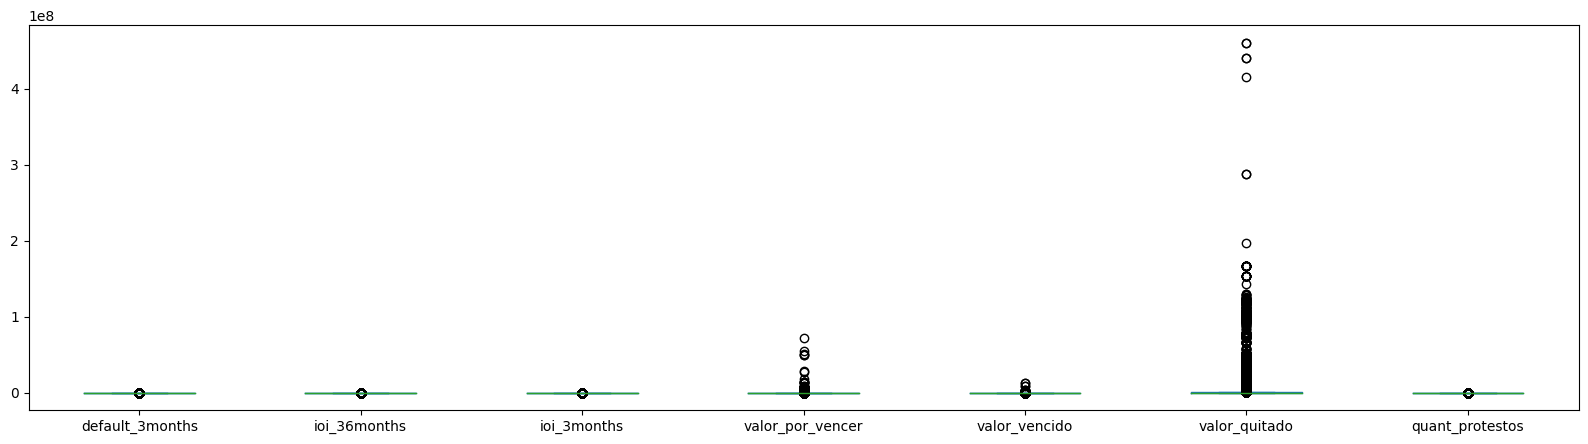

In [15]:
# Box plot
column_select = ~data_set.columns.isin(['participacao_falencia_valor', 'tipo_sociedade', 
                                        'opcao_tributaria',  'atividade_principal',
                                        'forma_pagamento', 'month', 'year', 'default'])
column_select = data_set.columns[column_select]

fig, axs = plt.subplots(figsize = (20, 5))
data_set[column_select[:7]].plot.box(ax = axs)
plt.show()

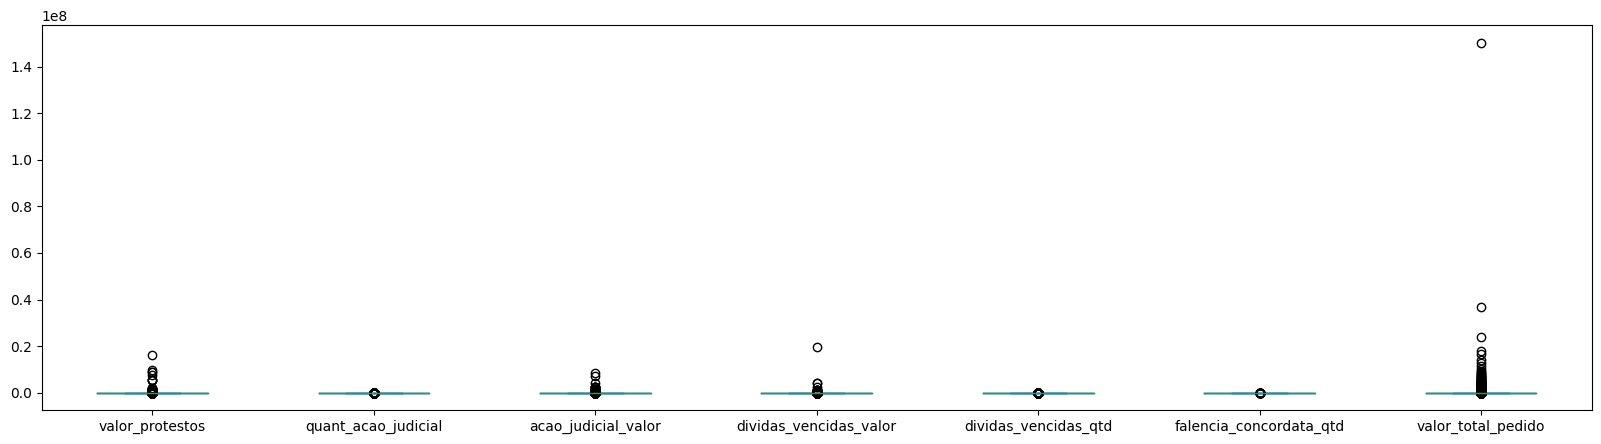

In [16]:
fig, axs = plt.subplots(figsize = (20, 5))
data_set[column_select[7:]].plot.box(ax = axs)
plt.show()

Histograma: 

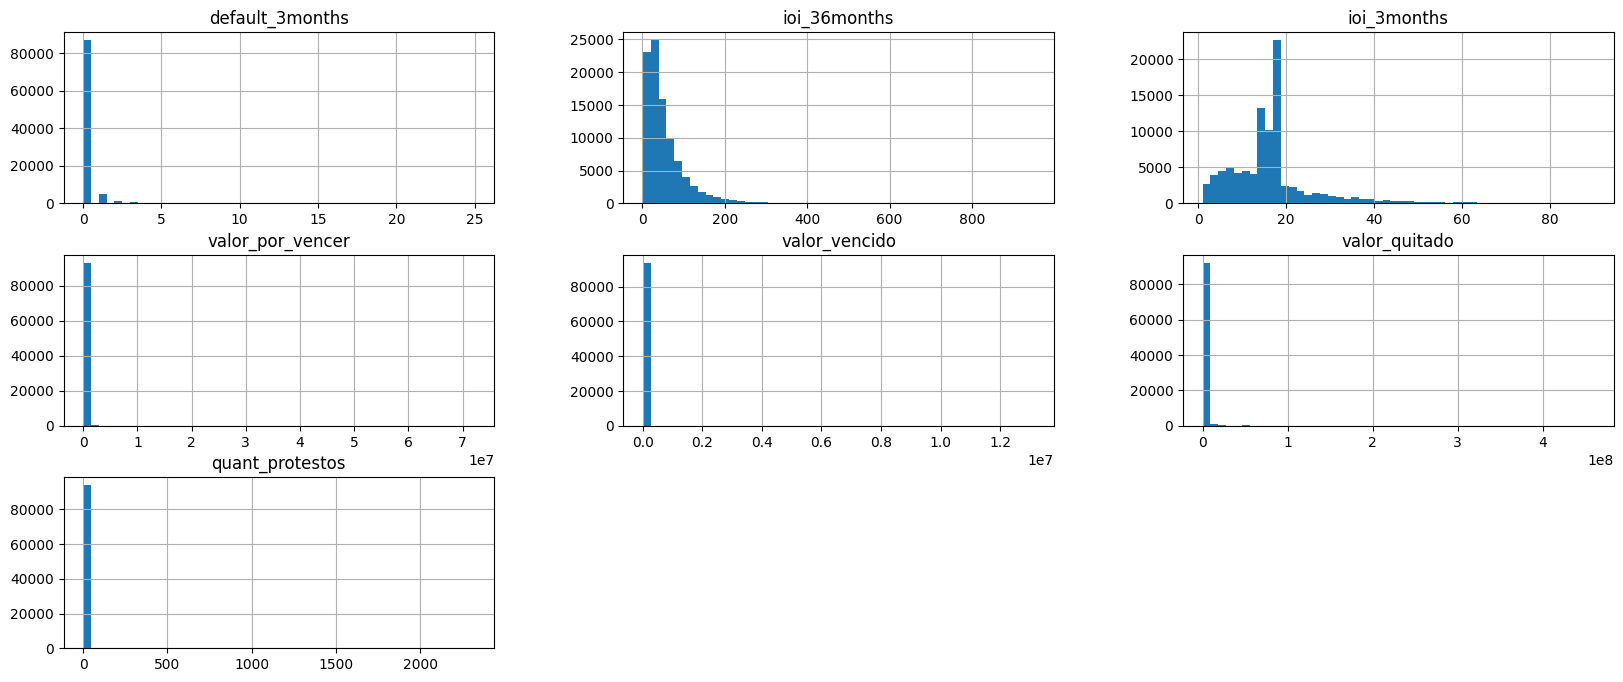

In [17]:
# Histogramas 
data_set[column_select[:7]].hist(bins = 50, figsize=(20, 8))
plt.show()

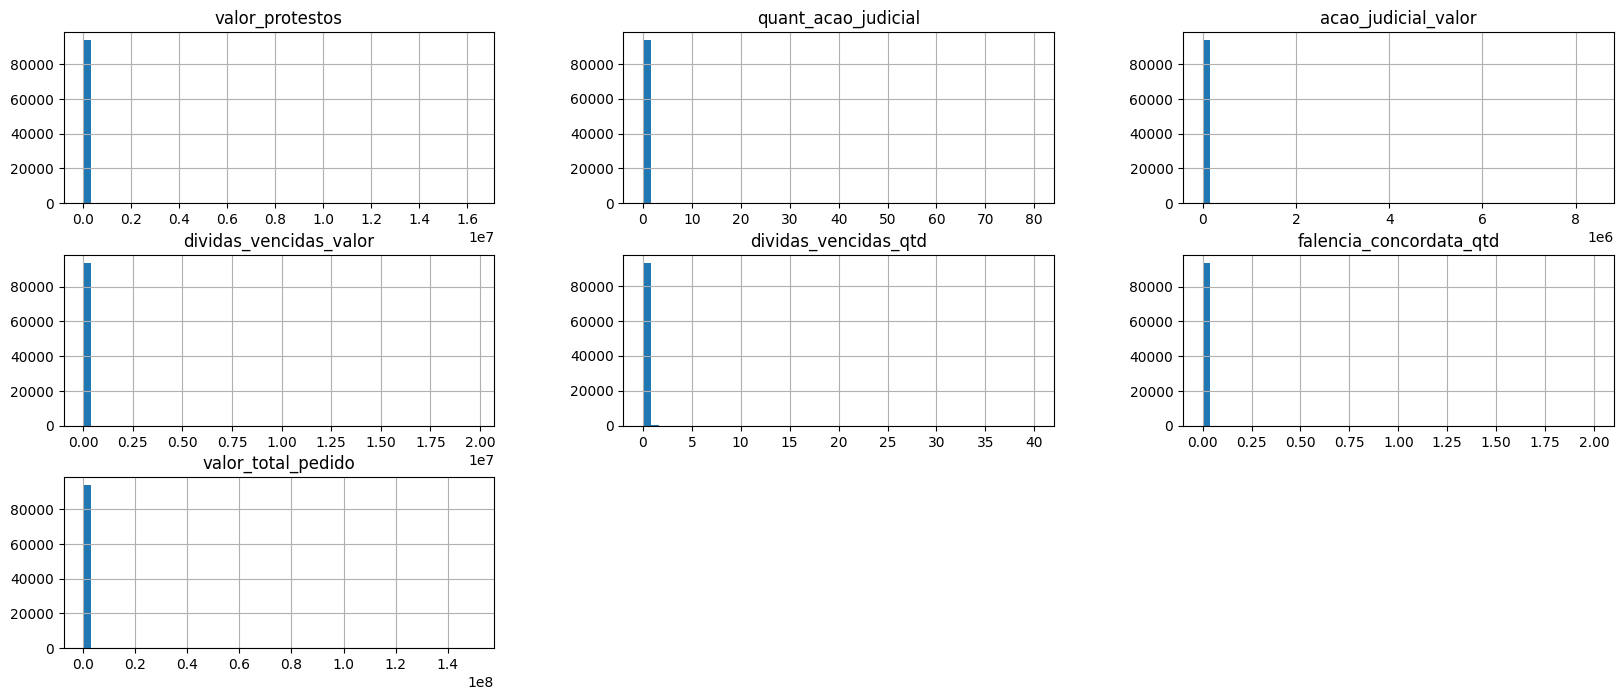

In [18]:
data_set[column_select[7:]].hist(bins = 50, figsize=(20, 8))
plt.show()

## <a id="desafio35"></a> 3.5) Variável de resposta e temporais

In [19]:
# Proporcao de variável de valores únicos da variável de resposta
y_train.value_counts(normalize = True).round(2)

0    0.83
1    0.17
Name: default, dtype: float64

## <a id="desafio36"></a> 3.6) Correlações

In [20]:
# copia conjunto de treinamento 
columns_select = data_set.columns.isin(['participacao_falencia_valor'])
data_set_copy = data_set.copy().loc[:, ~columns_select]

In [21]:
# matriz correlação de pearson 
corr_matrix = data_set_copy.corr(numeric_only = True)
corr_matrix.round(2).iloc[:, 3:12]

,valor_por_vencer,valor_vencido,valor_quitado,quant_protestos,valor_protestos,quant_acao_judicial,acao_judicial_valor,dividas_vencidas_valor,dividas_vencidas_qtd
default_3months,0.03,0.01,0.02,0.02,0.02,-0.00,-0.00,-0.00,-0.00
ioi_36months,-0.07,-0.02,-0.09,-0.01,-0.01,-0.01,-0.01,0.00,-0.01
ioi_3months,-0.08,-0.02,-0.10,-0.01,-0.01,-0.02,-0.01,-0.00,-0.01
valor_por_vencer,1.00,0.69,0.78,0.05,0.06,0.23,0.14,0.13,0.14
valor_vencido,0.69,1.00,0.55,0.03,0.04,0.12,0.12,0.07,0.09
valor_quitado,0.78,0.55,1.00,0.06,0.06,0.29,0.15,0.13,0.15
quant_protestos,0.05,0.03,0.06,1.00,0.49,0.21,0.33,0.06,0.28
valor_protestos,0.06,0.04,0.06,0.49,1.00,0.59,0.61,0.09,0.51
quant_acao_judicial,0.23,0.12,0.29,0.21,0.59,1.00,0.76,0.45,0.63
acao_judicial_valor,0.14,0.12,0.15,0.33,0.61,0.76,1.00,0.23,0.52


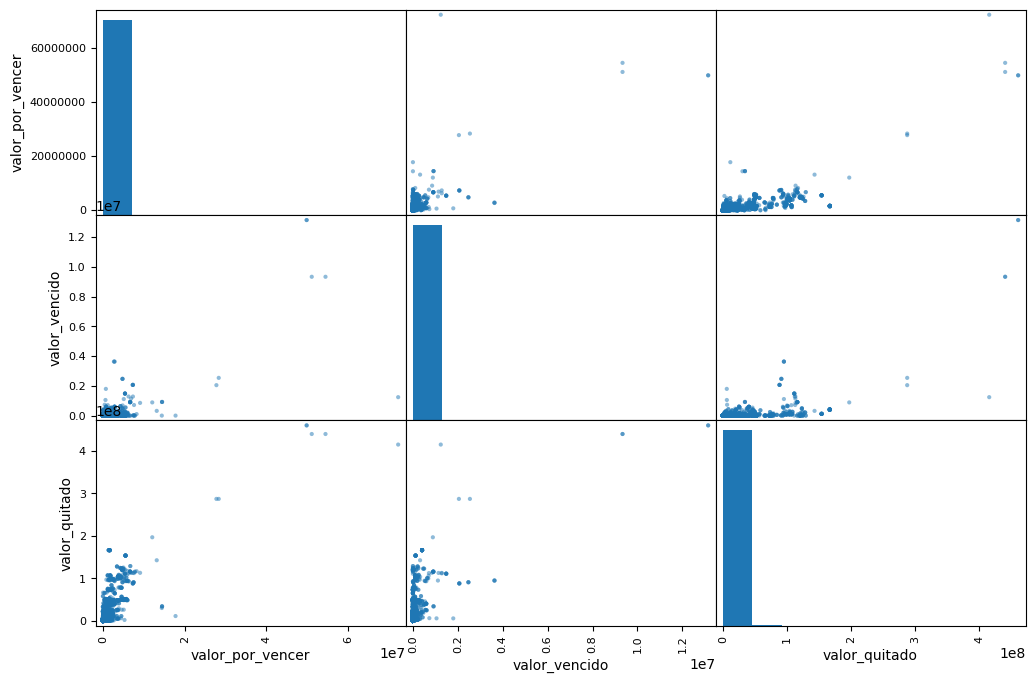

In [22]:
# Primeira dispersão por pares das variaveis com maior coeficiente de Pearson
from pandas.plotting import scatter_matrix

recursos = ['valor_por_vencer', 'valor_vencido', 'valor_quitado' ]
scatter_matrix(data_set_copy[recursos], figsize = (12, 8))
plt.show()

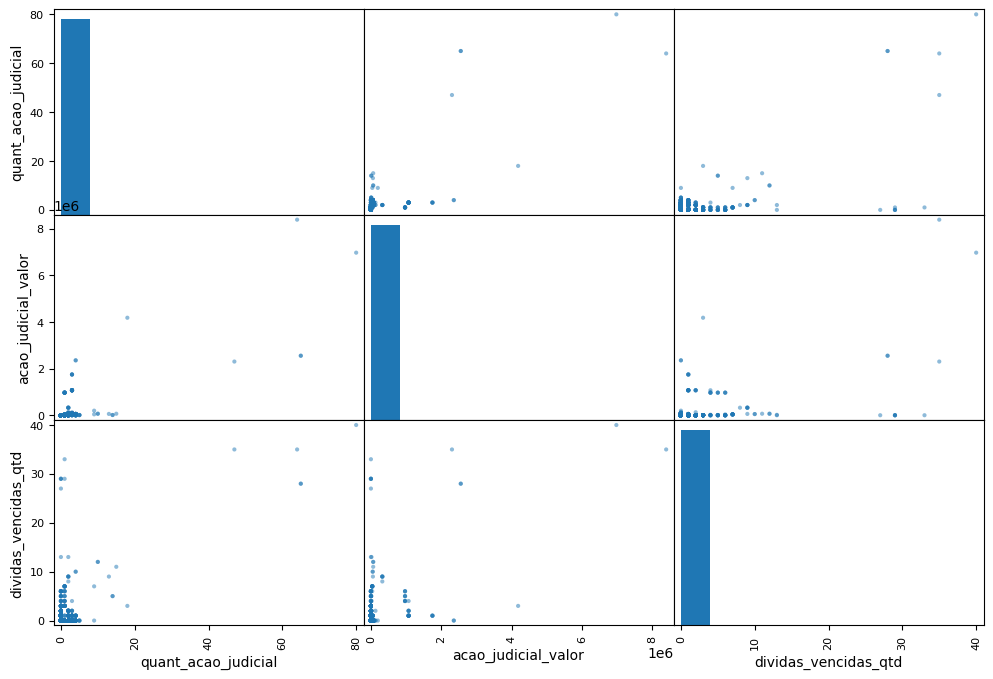

In [23]:
# Segunda dispersão por pares das variaveis com maior coeficiente de Pearson
from pandas.plotting import scatter_matrix

recursos = ['quant_acao_judicial', 'acao_judicial_valor', 'dividas_vencidas_qtd']
scatter_matrix(data_set_copy[recursos], figsize = (12, 8))
plt.show()

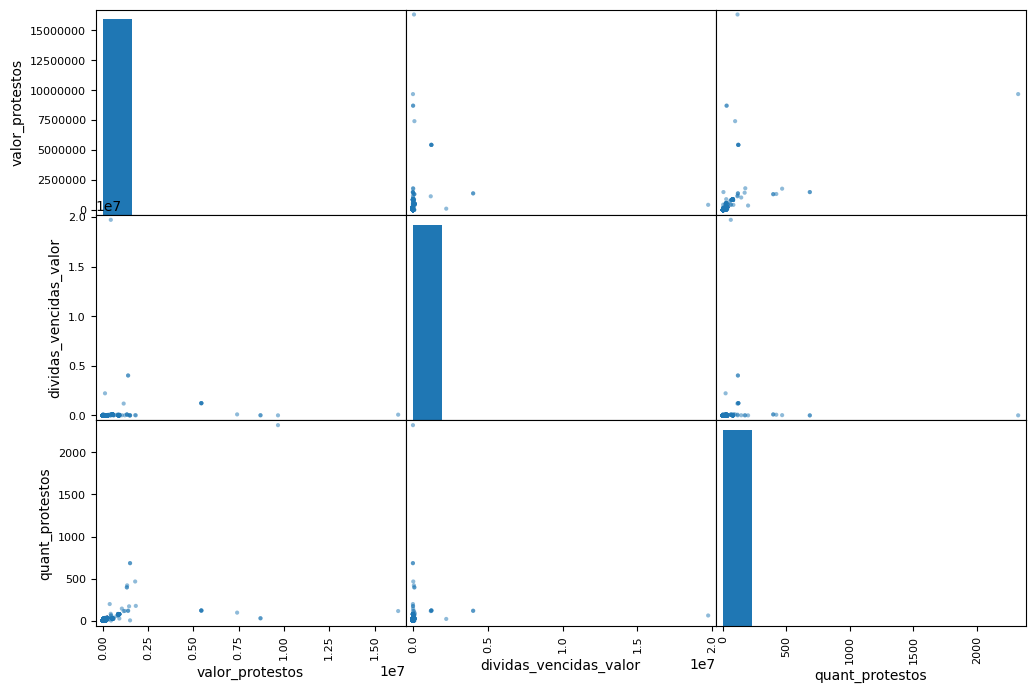

In [24]:
# Segunda dispersão por pares das variaveis com maior coeficiente de Pearson
from pandas.plotting import scatter_matrix

recursos = ['valor_protestos', 'dividas_vencidas_valor',  'quant_protestos']
scatter_matrix(data_set_copy[recursos], figsize = (12, 8))
plt.show()

> ## Acabou
> ### Muito obrigado por estar comigo